## 1. Given a undirected graph 

A graph has 8 nodes: {0,1,2,3,4,5,6,7} and the edge list: (0, 1), (1, 2), (2, 3), (0, 7), (0, 6), (4, 7), (4, 5), (5, 6), (5, 7).

Question 1. Caculate the The modularity of a graph with three partition: [{1, 2, 3},{4, 5, 6},{0, 7}]

Question 2. Find maximum clique in the graph.


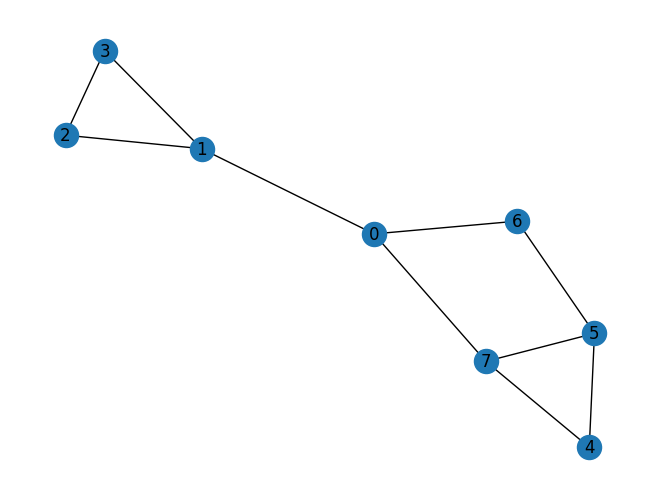

In [1]:
import networkx as nx
G = nx.Graph()


G.add_edges_from([(0, 1), (1, 2), (2, 3), (1, 3), (0, 7), (0, 6), (4, 7), (4, 5), (5, 6), (5, 7)])

nx.draw(G, with_labels=True)

In [2]:
partition = [
    {1, 2, 3},
    {4, 5, 6},
    {0, 7},
]

In [3]:
def modularity(G, partition):
    W = sum(G.edges[v, w].get('weight', 1) for v, w in G.edges)
    summation = 0
    for cluster_nodes in partition:
        s_c = sum(G.degree(n, weight='weight') for n in cluster_nodes)
        # Use subgraph to count only internal links
        C = G.subgraph(cluster_nodes)
        W_c = sum(C.edges[v, w].get('weight', 1) for v, w in C.edges)
        summation += W_c - s_c ** 2 / (4 * W)
    
    return summation / W

In [4]:
modularity(G, partition)


0.265

In [5]:
cliques = list(nx.find_cliques(G))
cliques
# Find maximum clique
max_clique = max(cliques, key=len)
max_clique

[2, 1, 3]

### 2. Read edge list file named: karate_edgelist.txt

Question 1. Compute communities using Louvain algorithm

Question 2. Visualize the communities

Question 3. Visualize the subgraphs for the communities. 

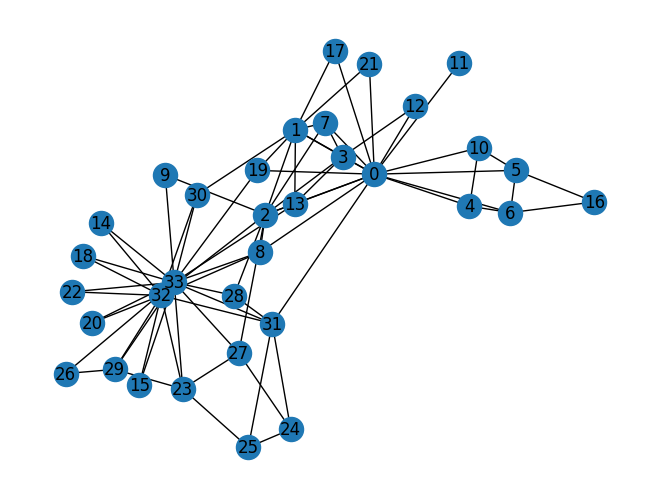

In [12]:
karate_graph = nx.read_edgelist('Karate_edgelist.txt')
nx.draw(karate_graph,with_labels = True)

In [13]:
# Import libraries
import community.community_louvain as community_louvain
import networkx.algorithms.community as nx_comm


In [14]:
# Construct node colours for each community
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#EF9A9A", "#BA68C8", "#64B5F6", "#81C784",
              "#FFF176", "#BDBDBD"][:number_of_colors]
    node_colors = []
    
    # iterate each node in the graph and find which community it belongs to
    # if the current node is found at a specific community, add color to the 
    # node_colors list
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors

In [15]:
# convert the python-louvain package output to 
# NetworkX package community function output format
def get_louvain_communities(graph, random_state=1):
    louvain_partition_dict = community_louvain.best_partition(graph, random_state=random_state)
    unique_partition_labels = list(set(louvain_partition_dict.values()))
    communities = [[] for i in range(len(unique_partition_labels))]
    for node in louvain_partition_dict.keys():
        communities[louvain_partition_dict[node]].append(node)
    return communities

In [16]:
# get communities using louvain algorithm
louvain_communities = get_louvain_communities(karate_graph, random_state=1)
louvain_communities

[['0', '21', '19', '17', '13', '12', '11', '7', '3', '2', '1', '9'],
 ['31', '28', '27', '23', '25', '24'],
 ['10', '6', '5', '4', '16'],
 ['8', '30', '32', '33', '14', '15', '18', '20', '22', '29', '26']]

In [17]:
# Visualize communities
def visualize_communities(graph, communities):
    # create visualization
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx_comm.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, 
                           k=0.3, iterations=50,
                           seed=2)

    plt.figure(1,figsize=(10,6)) 
    nx.draw(graph,
            pos = pos,
            node_size=1000,
            node_color=node_colors,
            with_labels=True,
            font_size = 20,
            font_color='black')
    plt.title(title)
    plt.show() 

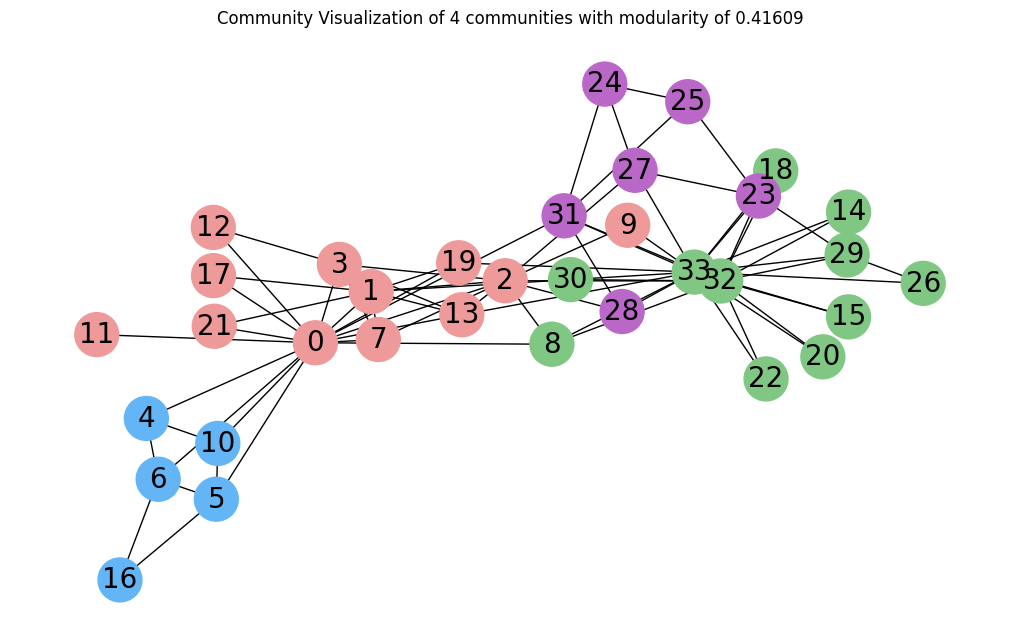

In [19]:
import matplotlib.pyplot as plt
visualize_communities(karate_graph, louvain_communities)


In [20]:
# visualizing all subgraphs
def visualize_subgraph(graph, subgraph_nodes, node_color):
    # get subgraph
    subgraph = nx.subgraph(graph, subgraph_nodes)

    # create visualization
    node_colors = [node_color] * len(subgraph_nodes)
    title = f"Community Partition Subgraph"
    pos = nx.spring_layout(subgraph, 
                           k=0.3, iterations=50,
                           seed=2)

    plt.figure(1,figsize=(8,6)) 
    nx.draw(subgraph,
            pos = pos,
            node_size=1000,
            node_color=node_colors,
            with_labels=True,
            font_size = 20,
            font_color='black')
    plt.title(title)
    plt.show() 

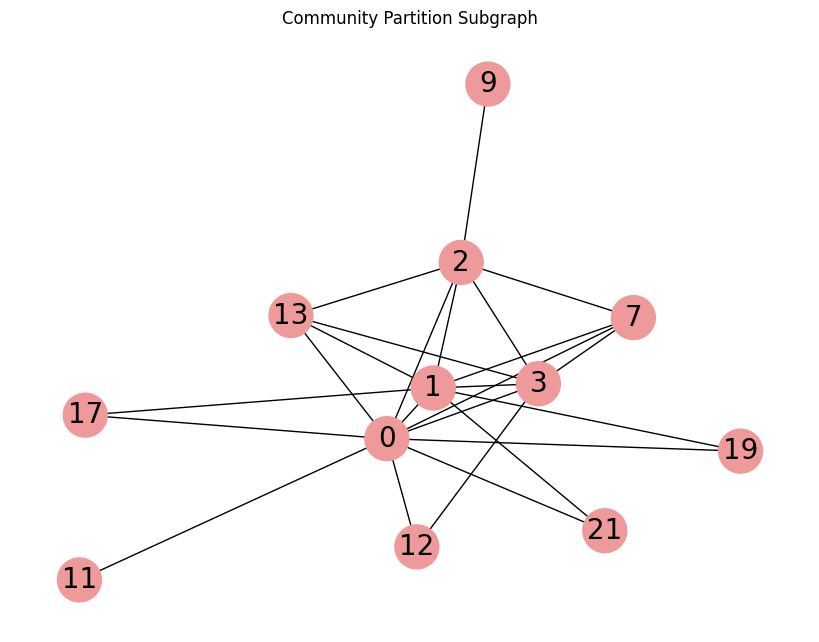

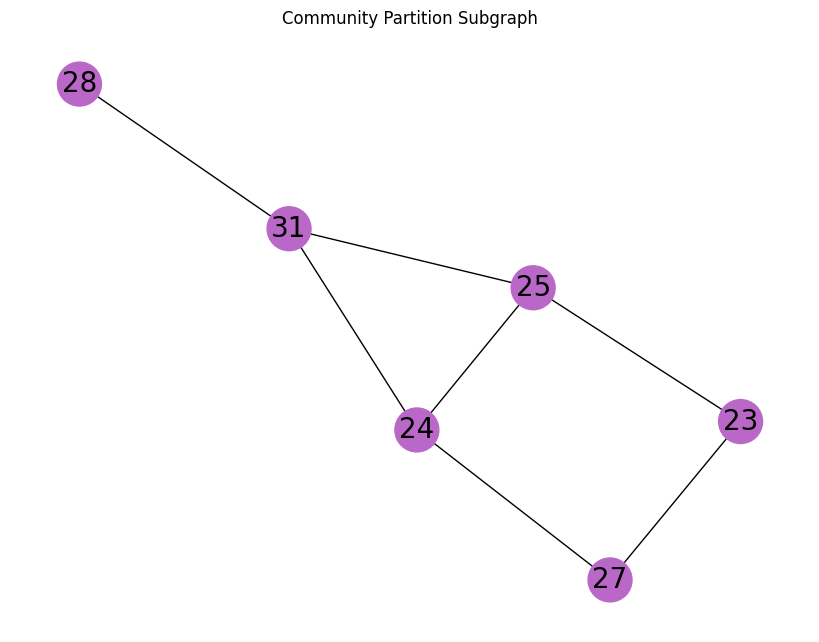

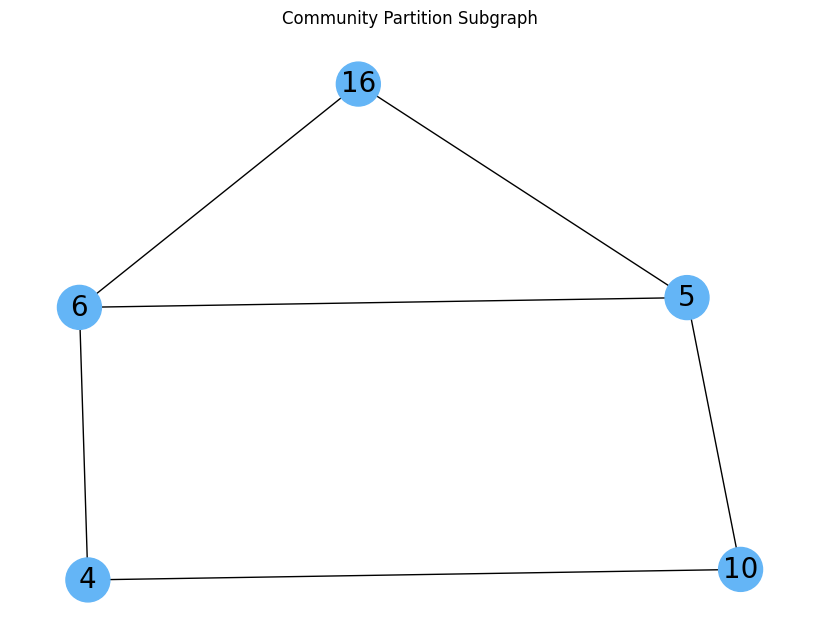

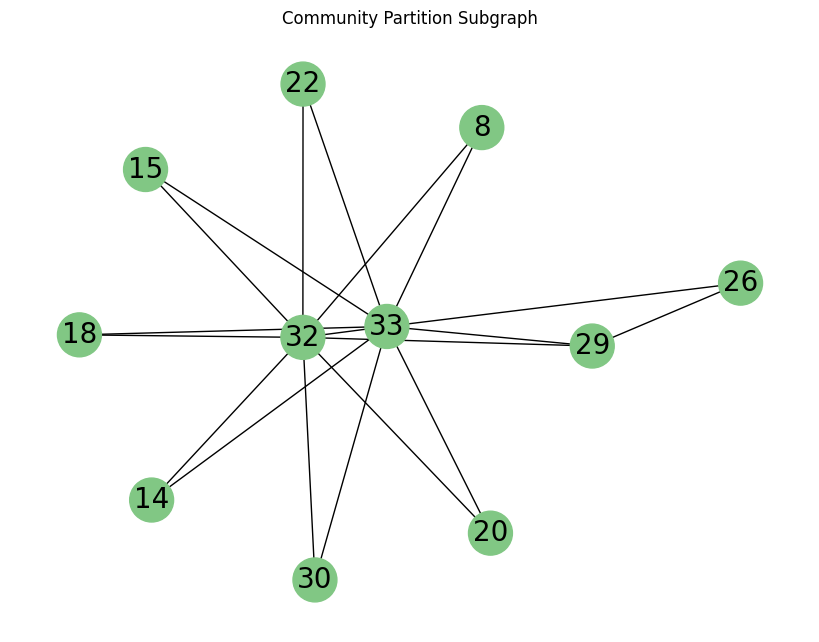

In [21]:
# Colouring each subgraph with a individual colour
colors = ["#EF9A9A", "#BA68C8", "#64B5F6", "#81C784", "#FFF176", "#BDBDBD"]
for i in range(len(louvain_communities)):
    visualize_subgraph(karate_graph, louvain_communities[i], colors[i])